In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load the color image
color_image = cv2.imread('/content/colorimg.jpg', cv2.IMREAD_COLOR)

# Load the grayscale image
gray_image = cv2.imread('/content/grayscale.jpg', cv2.IMREAD_GRAYSCALE)

# Display the images using matplotlib
plt.figure(figsize=(10, 5))

# Display the color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Color Image')
plt.axis('off')

# Display the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

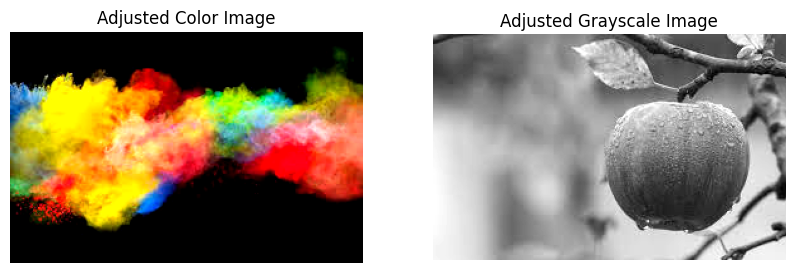

In [ ]:
import numpy as np

# Function to adjust brightness and contrast
def adjust_brightness_contrast(image, brightness=0, contrast=0):
    # Convert the image to float32 to prevent clipping values during multiplication
    image = image.astype(np.float32)

    # Apply the brightness and contrast adjustment
    new_image = image * (contrast / 127 + 1) - contrast + brightness

    # Clip the values to [0, 255] and convert back to uint8
    new_image = np.clip(new_image, 0, 255).astype(np.uint8)
    return new_image

# Adjust brightness and contrast for the color image
brightness = 30  # Positive values make the image brighter, negative values make it darker
contrast = 50    # Positive values increase contrast, negative values decrease contrast
adjusted_color_image = adjust_brightness_contrast(color_image, brightness, contrast)

# Adjust brightness and contrast for the grayscale image
adjusted_gray_image = adjust_brightness_contrast(gray_image, brightness, contrast)

# Display the adjusted images using matplotlib
plt.figure(figsize=(10, 5))

# Display the adjusted color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(adjusted_color_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Color Image')
plt.axis('off')

# Display the adjusted grayscale image
plt.subplot(1, 2, 2)
plt.imshow(adjusted_gray_image, cmap='gray')
plt.title('Adjusted Grayscale Image')
plt.axis('off')

plt.show()


First 10 RGB values:
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)

First 10 Grayscale values:
173
166
153
136
117
100
86
78
69
67


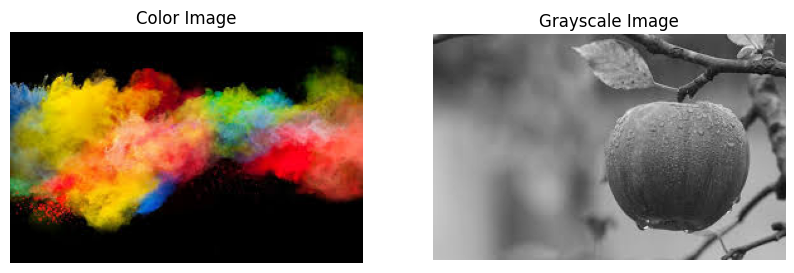

In [ ]:
# Function to get RGB values of each pixel in a color image
def get_rgb_values(image):
    # Get the dimensions of the image
    height, width, _ = image.shape

    # Initialize a list to store RGB values
    rgb_values = []

    # Iterate through each pixel and get the RGB values
    for row in range(height):
        for col in range(width):
            blue, green, red = image[row, col]
            rgb_values.append((red, green, blue))

    return rgb_values

# Function to get pixel values of each pixel in a grayscale image
def get_grayscale_values(image):
    # Get the dimensions of the image
    height, width = image.shape

    # Initialize a list to store grayscale values
    grayscale_values = []

    # Iterate through each pixel and get the grayscale values
    for row in range(height):
        for col in range(width):
            grayscale_values.append(image[row, col])

    return grayscale_values

# Get RGB values of the color image
rgb_values = get_rgb_values(color_image)

# Get grayscale values of the grayscale image
grayscale_values = get_grayscale_values(gray_image)

# Print the first 10 RGB values for demonstration
print("First 10 RGB values:")
for i in range(10):
    print(rgb_values[i])

# Print the first 10 grayscale values for demonstration
print("\nFirst 10 Grayscale values:")
for i in range(10):
    print(grayscale_values[i])

# Display the original color image for reference
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Color Image')
plt.axis('off')

# Display the original grayscale image for reference
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

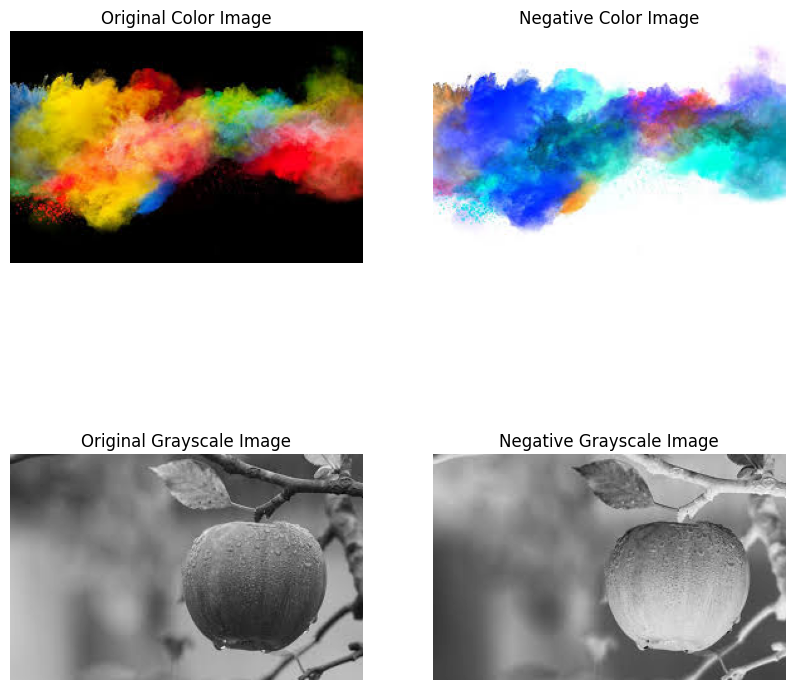

In [ ]:
# Function to create the digital negative of an image
def digital_negative(image):
    return 255 - image

# Create the digital negative for the color image
negative_color_image = digital_negative(color_image)

# Create the digital negative for the grayscale image
negative_gray_image = digital_negative(gray_image)

# Display the original and negative images using matplotlib
plt.figure(figsize=(10, 10))

# Display the original color image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

# Display the negative color image
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(negative_color_image, cv2.COLOR_BGR2RGB))
plt.title('Negative Color Image')
plt.axis('off')

# Display the adjusted color image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(adjusted_color_image, cv2.COLOR_BGR2RGB))
plt.title('Adjusted Color Image')
plt.axis('off')

# Display the original grayscale image
plt.subplot(2, 2, 3)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')


# Display the negative grayscale image
plt.subplot(2, 2, 4)
plt.imshow(negative_gray_image, cmap='gray')
plt.title('Negative Grayscale Image')
plt.axis('off')



plt.show()

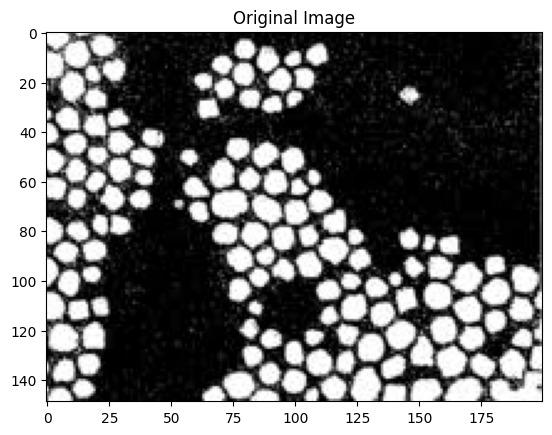

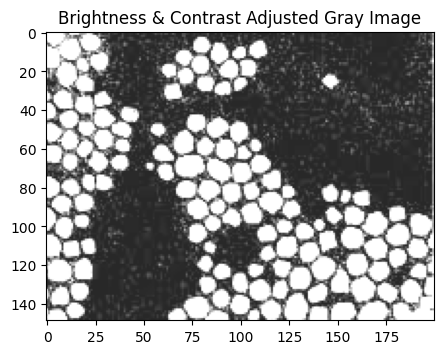

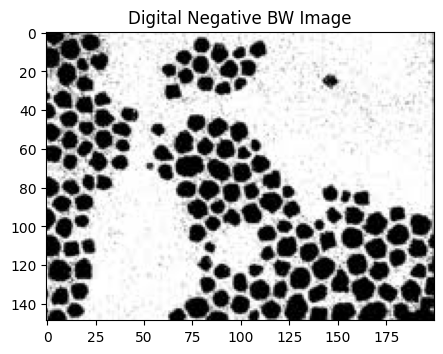

In [ ]:
from PIL import Image
image_path = '/content/binary.jpg'
bw_image = Image.open(image_path)
plt.title('Original Image')
plt.imshow(bw_image)


# Step 4: Adjust brightness and contrast FOR GRAY IMAGE
def adjust_brightness_contrast(image, brightness=0, contrast=0):
    # Convert PIL Image to NumPy array
    image_np = np.array(bw_image)
    new_image = cv2.convertScaleAbs(image_np, alpha=contrast, beta=brightness)  # Pass the NumPy array
    return new_image

adjusted_bw_image = adjust_brightness_contrast(bw_image, brightness=40, contrast=1.5)

# Display the adjusted image
plt.figure(figsize=(5, 5))
plt.title('Brightness & Contrast Adjusted Gray Image')
plt.imshow(adjusted_bw_image)
plt.show()

# Convert image to numpy array
bw_img_array = np.array(bw_image)

# Find the digital negative
negative_bw_image = 255 - bw_img_array

# Convert back to image
negative_bw_image = Image.fromarray(negative_bw_image)

# Display the digital negative
plt.figure(figsize=(5, 5))
plt.title('Digital Negative BW Image')
plt.imshow(negative_bw_image)
plt.show()